In [ ]:
!pip install -U cade
!pip install git+https://github.com/valedica/gensim.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 2.8 MB/s 
     |████████████████████████████████| 132 kB 39.8 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 9.0 MB 17.8 MB/s 
     |████████████████████████████████| 139 kB 39.7 MB/s 
     |████████████████████████████████| 127 kB 39.5 MB/s 
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90641 sha256=b3bce44c23fdc5606e6e8e53612c986b860ecb95566ceef25078b92231c2ba3f
  Stored in directory: /root/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
Successfully built smart-open
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.2.1
    Uninstalling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/') 

# CADE 2001 + 2002-2006

In [ ]:
!cat file2001.txt file0206.txt > post_2001_compass.txt

In [ ]:
# train the compass

from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
aligner_post = CADE(size=100)

aligner_post.train_compass("post_2001_compass.txt", overwrite=False) 

Training the compass from scratch.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# train the slices

slice_2001 = aligner_post.train_slice("file2001.txt", save=False)
slice_post2001 = aligner_post.train_slice("file0206.txt", save=False)

Training embeddings: slice file2001.txt.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Initializing embeddings from compass.
Training embeddings: slice file0206.txt.
Initializing embeddings from compass.


In [ ]:
from scipy.spatial.distance import cosine
print(1 - cosine(slice_2001.wv["attack"], slice_post2001.wv["attack"]))

0.8962146043777466


## Slice 2001 - Most Similar words for a word

In [ ]:
slice_2001.wv.most_similar("al-qaeda")

[('bin-laden', 0.8090569376945496),
 ('abu', 0.7365028858184814),
 ('hezbollah', 0.7260231375694275),
 ('mullah', 0.709945023059845),
 ('zawahiri', 0.7076342701911926),
 ('suspected', 0.7057234644889832),
 ('jordanian', 0.7056095004081726),
 ('hijazi', 0.7050595283508301),
 ('lieutenants', 0.7000184059143066),
 ('jihad', 0.6982947587966919)]

In [ ]:
slice_2001.wv.most_similar("bin-laden")

[('al-qaeda', 0.8090568780899048),
 ('osama', 0.7779165506362915),
 ('usama', 0.6690713167190552),
 ('abu', 0.6646333932876587),
 ('jihad', 0.6592254638671875),
 ('followers', 0.6471511125564575),
 ('terrorism', 0.6370642185211182),
 ('mastermind', 0.6329463720321655),
 ('terrorists', 0.6303355693817139),
 ('zawahiri', 0.6283695101737976)]

In [ ]:
slice_2001.wv.most_similar("airplane")

[('airplanes', 0.7744616270065308),
 ('planes', 0.74319988489151),
 ('plane', 0.7169516086578369),
 ('fly', 0.7088930606842041),
 ('jet', 0.7055981755256653),
 ('crashes', 0.7002628445625305),
 ('airliner', 0.6970553398132324),
 ('sonic', 0.6962466835975647),
 ('passenger', 0.695518970489502),
 ('cockpit', 0.6855412721633911)]

In [ ]:
slice_2001.wv.most_similar("twin-towers")

[('world-trade-center', 0.8646990060806274),
 ('towers', 0.8293426036834717),
 ('jetliners', 0.7541654109954834),
 ('hijacked', 0.7435314059257507),
 ('crashing', 0.7347702980041504),
 ('explosion', 0.7320988178253174),
 ('crash', 0.7126274704933167),
 ('blast', 0.7069304585456848),
 ('crashed', 0.7020089030265808),
 ('slammed', 0.701542317867279)]

In [ ]:
slice_2001.wv.most_similar("tower")

[('towers', 0.6997849941253662),
 ('floors', 0.6654189825057983),
 ('world-trade-center', 0.6587096452713013),
 ('building', 0.5969346165657043),
 ('collapsed', 0.5911623239517212),
 ('sears', 0.5908570289611816),
 ('girders', 0.5895817279815674),
 ('twin-towers', 0.5843409299850464),
 ('crashed', 0.5815579891204834),
 ('collapsing', 0.5737409591674805)]

In [ ]:
slice_2001.wv.most_similar("terrorism")

[('terror', 0.7699822187423706),
 ('terrorists', 0.7626993656158447),
 ('allies', 0.6932154297828674),
 ('retaliation', 0.6817615628242493),
 ('enemies', 0.6474035978317261),
 ('threats', 0.6416966915130615),
 ('terrorist', 0.6382257342338562),
 ('bin-laden', 0.6370642185211182),
 ('extremism', 0.6296976804733276),
 ('perpetrators', 0.6259813904762268)]

In [ ]:
slice_2001.wv.most_similar("world-trade-center")

[('twin-towers', 0.8646989464759827),
 ('towers', 0.839247465133667),
 ('hijacked', 0.6893710494041443),
 ('tower', 0.6587095260620117),
 ('crashed', 0.6528612375259399),
 ('khobar', 0.6436488628387451),
 ('pentagon', 0.6411260962486267),
 ('jetliners', 0.6387605667114258),
 ('crash', 0.6313552260398865),
 ('explosion', 0.629797101020813)]

In [ ]:
slice_2001.wv.most_similar("attack")

[('attacks', 0.7905347347259521),
 ('bombing', 0.6552965044975281),
 ('assault', 0.6132609248161316),
 ('twin-towers', 0.6052719354629517),
 ('strikes', 0.6007945537567139),
 ('target', 0.5781395435333252),
 ('raids', 0.5754142999649048),
 ('bombed', 0.5743542909622192),
 ('meir', 0.572228193283081),
 ('assaults', 0.561633825302124)]

In [ ]:
slice_2001.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('crashed', 0.8692955374717712),
 ('planes', 0.8278573751449585),
 ('airliner', 0.8275831937789917),
 ('jetliner', 0.8180452585220337),
 ('airliners', 0.8049421310424805),
 ('jetliners', 0.8009735345840454),
 ('aboard', 0.7923548817634583),
 ('flown', 0.7792330980300903),
 ('lockerbie', 0.7533528804779053),
 ('downed', 0.7520084381103516)]

In [ ]:
slice_2001.wv.most_similar("firefighter")

[('capt', 0.7577361464500427),
 ('farmingville', 0.681394100189209),
 ('hawkins', 0.6796417236328125),
 ('mccarty', 0.6701102256774902),
 ('brooks', 0.668857216835022),
 ('ronnie', 0.6646124720573425),
 ('fitzgerald', 0.6350599527359009),
 ('burgess', 0.6341874599456787),
 ('darrius', 0.6326850652694702),
 ('sanford', 0.6319226026535034)]

In [ ]:
slice_2001.wv.most_similar("afghanistan")

[('taliban', 0.7685908079147339),
 ('soviets', 0.7555220127105713),
 ('afghan', 0.7522592544555664),
 ('pakistan', 0.7347162961959839),
 ('afghans', 0.7339910268783569),
 ('iraq', 0.7243285775184631),
 ('kabul', 0.7127588987350464),
 ('kuwait', 0.70330810546875),
 ('chechnya', 0.6966823935508728),
 ('kosovo', 0.695796012878418)]

In [ ]:
slice_2001.wv.most_similar("islam")

[('islamic', 0.8279458284378052),
 ('muslim', 0.7988558411598206),
 ('religion', 0.7964396476745605),
 ('religious', 0.7935509085655212),
 ('muslims', 0.7725282907485962),
 ('koran', 0.768575131893158),
 ('teachings', 0.7615712881088257),
 ('beliefs', 0.7583587169647217),
 ('fundamentalism', 0.7458074688911438),
 ('secular', 0.7453149557113647)]

In [ ]:
slice_2001.wv.most_similar("jihad")

[('militant', 0.830238938331604),
 ('azzam', 0.8009593486785889),
 ('zawahiri', 0.7990527153015137),
 ('sheik', 0.7981021404266357),
 ('saudis', 0.792589545249939),
 ('cleric', 0.7922502756118774),
 ('militants', 0.790555477142334),
 ('fundamentalist', 0.7904261350631714),
 ('egyptian', 0.7838220596313477),
 ('extremists', 0.7826817631721497)]

## Slice post 2001 - Most Similar words for a word

In [ ]:
slice_post2001.wv.most_similar("al-qaeda")

[('qaeda', 0.8610901236534119),
 ('zarqawi', 0.8032412528991699),
 ('ansar', 0.7955365180969238),
 ('bin-laden', 0.7945955991744995),
 ('operatives', 0.7718195915222168),
 ('taliban', 0.7146230340003967),
 ('terrorists', 0.7139463424682617),
 ('sympathizers', 0.7029005289077759),
 ('zawahiri', 0.7012207508087158),
 ('fugitives', 0.7009357810020447)]

In [ ]:
slice_post2001.wv.most_similar("bin-laden")

[('osama', 0.811343252658844),
 ('al-qaeda', 0.7945955991744995),
 ('zarqawi', 0.7252694368362427),
 ('ayman', 0.7188376784324646),
 ('zawahiri', 0.7097195982933044),
 ('qaeda', 0.677253246307373),
 ('ansar', 0.6539111137390137),
 ('berntsen', 0.6513137817382812),
 ('zubaydah', 0.6501169204711914),
 ('uae', 0.612429141998291)]

In [ ]:
slice_post2001.wv.most_similar("airplane")

[('plane', 0.8428081274032593),
 ('airplanes', 0.7833129167556763),
 ('jet', 0.7529829740524292),
 ('planes', 0.7527538537979126),
 ('flying', 0.71822190284729),
 ('passenger', 0.7045504450798035),
 ('aircraft', 0.7032725811004639),
 ('takeoff', 0.7026083469390869),
 ('cockpit', 0.6914555430412292),
 ('concorde', 0.6803808808326721)]

In [ ]:
slice_post2001.wv.most_similar("twin-towers")

[('world-trade-center', 0.725966215133667),
 ('rubble', 0.6895756125450134),
 ('wreckage', 0.6547107696533203),
 ('towers', 0.645986020565033),
 ('collapsed', 0.6040792465209961),
 ('collapsing', 0.6024094820022583),
 ('skyscraper', 0.6015520095825195),
 ('footprints', 0.5953075885772705),
 ('debris', 0.5930983424186707),
 ('prieta', 0.5888348817825317)]

In [ ]:
slice_post2001.wv.most_similar("tower")

[('towers', 0.6783847808837891),
 ('skyscraper', 0.6200429201126099),
 ('building', 0.5825181603431702),
 ('atrium', 0.5753589272499084),
 ('terminal', 0.5551120638847351),
 ('loft', 0.5544729232788086),
 ('cavernous', 0.5411748886108398),
 ('lofts', 0.54112708568573),
 ('skyscrapers', 0.5306087136268616),
 ('gleaming', 0.5260555744171143)]

In [ ]:
slice_post2001.wv.most_similar("terrorism")

[('terror', 0.8252378106117249),
 ('terrorists', 0.6877284049987793),
 ('terrorist', 0.675013542175293),
 ('justified', 0.6317834258079529),
 ('allies', 0.6099807024002075),
 ('bioterrorism', 0.5981762409210205),
 ('waging', 0.5981665253639221),
 ('al-qaeda', 0.5886764526367188),
 ('enemies', 0.5864192843437195),
 ('regimes', 0.5673732161521912)]

In [ ]:
slice_post2001.wv.most_similar("world-trade-center")

[('twin-towers', 0.725966215133667),
 ('hijacked', 0.6842461228370667),
 ('perished', 0.6306223273277283),
 ('wreckage', 0.5599220395088196),
 ('crashed', 0.5571510195732117),
 ('memorials', 0.5515643954277039),
 ('bombing', 0.5482842326164246),
 ('skyscraper', 0.540882408618927),
 ('towers', 0.5396820306777954),
 ('airliner', 0.5353580713272095)]

In [ ]:
slice_post2001.wv.most_similar("attack")

[('attacks', 0.8325445652008057),
 ('bombings', 0.6367852091789246),
 ('bombing', 0.6189477443695068),
 ('strikes', 0.5983022451400757),
 ('hijackings', 0.5949425101280212),
 ('bombers', 0.5884819030761719),
 ('strike', 0.5870813727378845),
 ('targets', 0.5634766817092896),
 ('attacked', 0.5401079058647156),
 ('airstrikes', 0.537919282913208)]

In [ ]:
slice_post2001.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('airliner', 0.7731039524078369),
 ('crashed', 0.7617220878601074),
 ('piloted', 0.7576017379760742),
 ('planes', 0.7524751424789429),
 ('airliners', 0.7340711355209351),
 ('aircraft', 0.7160544395446777),
 ('jet', 0.7125546932220459),
 ('jetliners', 0.7055745124816895),
 ('hijacking', 0.6984730362892151),
 ('plane', 0.6955136656761169)]

In [ ]:
slice_post2001.wv.most_similar("firefighter")

[('baldwin', 0.6178949475288391),
 ('paramedic', 0.6150098443031311),
 ('vincent', 0.610114574432373),
 ('massapequa', 0.6036584377288818),
 ('capt', 0.5973884463310242),
 ('gerard', 0.5869446396827698),
 ('childers', 0.576244592666626),
 ('gardner', 0.5744855999946594),
 ('finnegan', 0.5707736611366272),
 ('fireman', 0.5678972601890564)]

In [ ]:
slice_post2001.wv.most_similar("afghanistan")

[('taliban', 0.7684522867202759),
 ('afghan', 0.7518801093101501),
 ('chechnya', 0.7218910455703735),
 ('kosovo', 0.6874760389328003),
 ('iraq', 0.6828940510749817),
 ('kabul', 0.6761292219161987),
 ('somalia', 0.6753412485122681),
 ('tora', 0.6685632467269897),
 ('pakistan', 0.6667146682739258),
 ('bora', 0.6658228039741516)]

In [ ]:
slice_post2001.wv.most_similar("islam")

[('christianity', 0.7908824682235718),
 ('muslims', 0.7867022752761841),
 ('muslim', 0.7801535725593567),
 ('religion', 0.7717848420143127),
 ('islamists', 0.7695070505142212),
 ('fundamentalist', 0.7671900391578674),
 ('fundamentalists', 0.7610535025596619),
 ('secular', 0.7438098192214966),
 ('religions', 0.7430902123451233),
 ('militancy', 0.7409167885780334)]

In [ ]:
slice_post2001.wv.most_similar("jihad")

[('islamists', 0.7879983186721802),
 ('militant', 0.7790178656578064),
 ('fundamentalists', 0.7685285210609436),
 ('extremist', 0.7536574602127075),
 ('islamist', 0.7531596422195435),
 ('laskar', 0.7488007545471191),
 ('brotherhood', 0.7475516200065613),
 ('followers', 0.7368888258934021),
 ('extremists', 0.7309972047805786),
 ('muslims', 0.7272346615791321)]

## Word in a Slice - Most similar - same word in the other Slice

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.8601099848747253),
 ('terror', 0.7282745838165283),
 ('terrorists', 0.6817121505737305),
 ('terrorist', 0.6292604804039001),
 ('allies', 0.6168237328529358),
 ('cooperation', 0.5664006471633911),
 ('iraq', 0.5503021478652954),
 ('threats', 0.5454463958740234),
 ('threat', 0.542778730392456),
 ('enemies', 0.5410130620002747)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.8601100444793701),
 ('terror', 0.7670406699180603),
 ('terrorists', 0.7115612626075745),
 ('justified', 0.6867606043815613),
 ('enemies', 0.6508042812347412),
 ('preemptive', 0.6428782939910889),
 ('provoke', 0.6399405002593994),
 ('bloodshed', 0.632704496383667),
 ('deterring', 0.6245336532592773),
 ('wmd', 0.6168397665023804)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('towers', 0.7923259735107422),
 ('twin-towers', 0.7602124214172363),
 ('world-trade-center', 0.7548124194145203),
 ('rubble', 0.6600008010864258),
 ('debris', 0.623054563999176),
 ('crashing', 0.6149132251739502),
 ('explosion', 0.6067724227905273),
 ('damaged', 0.5981543064117432),
 ('collapse', 0.5972974300384521),
 ('devastation', 0.5936475992202759)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('world-trade-center', 0.7978274822235107),
 ('twin-towers', 0.7602124214172363),
 ('hijacked', 0.6733167171478271),
 ('blast', 0.6696257591247559),
 ('jetliner', 0.6641110777854919),
 ('crashed', 0.6553894877433777),
 ('kirklin', 0.651657223701477),
 ('crash', 0.6466858983039856),
 ('perished', 0.636101245880127),
 ('wreckage', 0.6315909624099731)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["al-qaeda"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('bin-laden', 0.8425512909889221),
 ('al-qaeda', 0.8391448259353638),
 ('terrorists', 0.7075495719909668),
 ('taliban', 0.6871961355209351),
 ('jihad', 0.6860358715057373),
 ('osama', 0.6746854782104492),
 ('terrorist', 0.674157977104187),
 ('suspected', 0.648751437664032),
 ('commanders', 0.6427724361419678),
 ('pakistan', 0.6340947151184082)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["al-qaeda"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('al-qaeda', 0.839144766330719),
 ('qaeda', 0.8241816759109497),
 ('ansar', 0.8216359615325928),
 ('zarqawi', 0.7769383192062378),
 ('jemaah', 0.7642350196838379),
 ('ji', 0.7616214156150818),
 ('zawahiri', 0.7569140195846558),
 ('jundullah', 0.73520827293396),
 ('islamiyah', 0.7301344871520996),
 ('hambali', 0.7286860942840576)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('world-trade-center', 0.8785865902900696),
 ('twin-towers', 0.7978274822235107),
 ('towers', 0.7278821468353271),
 ('hijacked', 0.6940995454788208),
 ('pentagon', 0.6493778228759766),
 ('bomb', 0.6354389190673828),
 ('khobar', 0.6297942399978638),
 ('crash', 0.6238499879837036),
 ('bombing', 0.5934004783630371),
 ('bombed', 0.5894257426261902)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('world-trade-center', 0.8785866498947144),
 ('twin-towers', 0.754812479019165),
 ('hijacked', 0.6335992813110352),
 ('towers', 0.6228892803192139),
 ('skyscraper', 0.6180709600448608),
 ('perished', 0.6031574010848999),
 ('tower', 0.5859665274620056),
 ('crashed', 0.5546648502349854),
 ('rescuers', 0.5517700910568237),
 ('wreckage', 0.5500852465629578)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('hijacked', 0.8694359660148621),
 ('crashed', 0.8058532476425171),
 ('airliner', 0.7835676670074463),
 ('planes', 0.7571542263031006),
 ('piloted', 0.7570210695266724),
 ('hijacking', 0.7563694715499878),
 ('plane', 0.7443135976791382),
 ('takeoff', 0.7409105896949768),
 ('uss', 0.7355268001556396),
 ('boarded', 0.7351264953613281)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('hijacked', 0.8694360256195068),
 ('crashed', 0.8104220628738403),
 ('airliners', 0.787243664264679),
 ('airliner', 0.7441716194152832),
 ('planes', 0.73714280128479),
 ('jetliner', 0.7222847938537598),
 ('bombed', 0.689455509185791),
 ('jet', 0.6872084736824036),
 ('aircraft', 0.686701238155365),
 ('crash', 0.6824782490730286)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.881231427192688),
 ('attacks', 0.7730422019958496),
 ('bombing', 0.6502823233604431),
 ('bombings', 0.6422498226165771),
 ('hijackings', 0.6221123337745667),
 ('strikes', 0.6019372344017029),
 ('bombers', 0.5955439805984497),
 ('deadliest', 0.5555469989776611),
 ('suicide', 0.5537532567977905),
 ('hijacked', 0.5379918813705444)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.8812314867973328),
 ('attacks', 0.7210871577262878),
 ('bombing', 0.6203418374061584),
 ('strikes', 0.614286482334137),
 ('targets', 0.5818933248519897),
 ('threat', 0.5658309459686279),
 ('struck', 0.564990758895874),
 ('assault', 0.5621775984764099),
 ('assaults', 0.5583570599555969),
 ('meir', 0.5467302799224854)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('airplane', 0.8406713008880615),
 ('plane', 0.7898191213607788),
 ('takeoff', 0.7535542845726013),
 ('airliner', 0.750266432762146),
 ('jet', 0.7434737086296082),
 ('airplanes', 0.7330509424209595),
 ('concorde', 0.7275786399841309),
 ('planes', 0.7223475575447083),
 ('cockpit', 0.7117847204208374),
 ('passenger', 0.698814868927002)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('airplane', 0.840671181678772),
 ('jet', 0.7870273590087891),
 ('airplanes', 0.7785206437110901),
 ('plane', 0.7754884958267212),
 ('planes', 0.7627367973327637),
 ('flying', 0.7313826084136963),
 ('fly', 0.7221652865409851),
 ('cockpit', 0.7110198140144348),
 ('airbus', 0.7102293968200684),
 ('sonic', 0.7081864476203918)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.9189542531967163),
 ('islamists', 0.800365686416626),
 ('wahhabi', 0.7974363565444946),
 ('ideology', 0.7910540103912354),
 ('fundamentalist', 0.7752841114997864),
 ('secular', 0.7681353688240051),
 ('fundamentalism', 0.7655671834945679),
 ('christianity', 0.7632064819335938),
 ('religion', 0.7616536617279053),
 ('islamic', 0.7557157278060913)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.9189542531967163),
 ('islamic', 0.8241896629333496),
 ('muslim', 0.802487313747406),
 ('muslims', 0.7673503756523132),
 ('religion', 0.7540108561515808),
 ('christianity', 0.75377357006073),
 ('religions', 0.7290298938751221),
 ('religious', 0.7152626514434814),
 ('beliefs', 0.7037339210510254),
 ('jihad', 0.6985554695129395)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["crash"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crash', 0.8157743215560913),
 ('accident', 0.7122206687927246),
 ('plane', 0.6877024173736572),
 ('crashed', 0.6860170364379883),
 ('airliner', 0.684158980846405),
 ('hijacked', 0.6824782490730286),
 ('takeoff', 0.6741041541099548),
 ('jetliner', 0.6561691761016846),
 ('crashes', 0.6536311507225037),
 ('jet', 0.6252954006195068)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["crash"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crash', 0.8157742619514465),
 ('accident', 0.7583784461021423),
 ('jet', 0.6564657688140869),
 ('crashed', 0.6525710821151733),
 ('twin-towers', 0.6466858386993408),
 ('plane', 0.6466485261917114),
 ('crashes', 0.6460363864898682),
 ('hijacked', 0.6379339098930359),
 ('airplanes', 0.6250540614128113),
 ('bomb', 0.6181762218475342)]

## Slice 2001 vs Slice post 2001 - Similarity between keywords

In [ ]:
slice_2001.wv.similarity("airplane", 'twin-towers')

0.58657783

In [ ]:
slice_post2001.wv.similarity("airplane", "twin-towers")

0.36608925

In [ ]:
slice_2001.wv.similarity("airplane", 'hijacked')

0.6705743

In [ ]:
slice_post2001.wv.similarity("airplane", 'hijacked')

0.65850544

In [ ]:
slice_2001.wv.similarity("attack", 'world-trade-center')

0.4934898

In [ ]:
slice_post2001.wv.similarity("attack", 'world-trade-center')

0.37279546

In [ ]:
slice_2001.wv.similarity("firefighter", 'terrorist')

-0.010036015

In [ ]:
slice_post2001.wv.similarity("firefighter", 'terrorist')

-0.12369982

In [ ]:
slice_2001.wv.similarity("bin-laden", 'terrorists')

0.6303356

In [ ]:
slice_post2001.wv.similarity("bin-laden", 'terrorists')

0.57259494

In [ ]:
slice_2001.wv.similarity("al-qaeda", 'terrorists')

0.5836239

In [ ]:
slice_post2001.wv.similarity("al-qaeda", 'terrorists')

0.7139463

In [ ]:
slice_2001.wv.similarity("collapse", 'tower')

0.397792

In [ ]:
slice_post2001.wv.similarity("collapse", 'tower')

0.24869919

## Slice 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_2001.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_2001[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


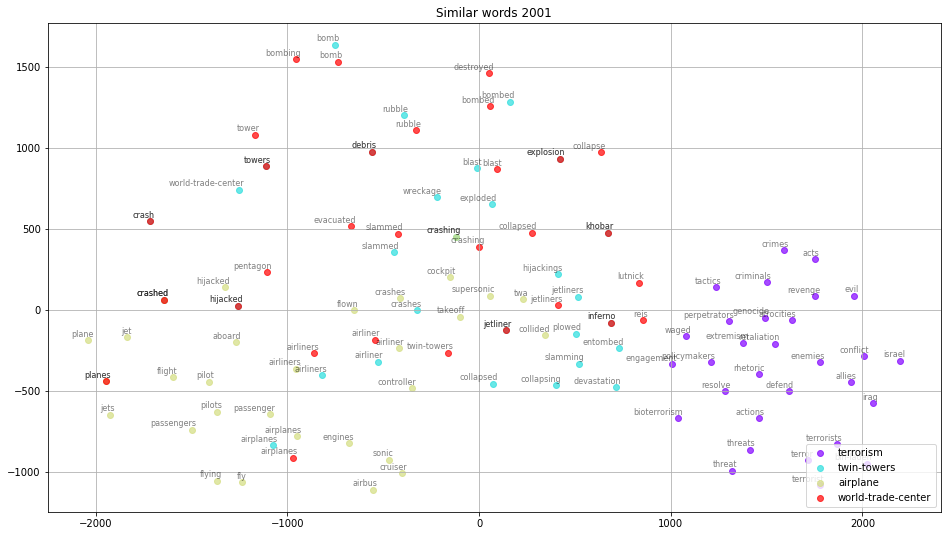

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words 2001', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_CADE2001.png')

## Slice post 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']


embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_post2001.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_post2001[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


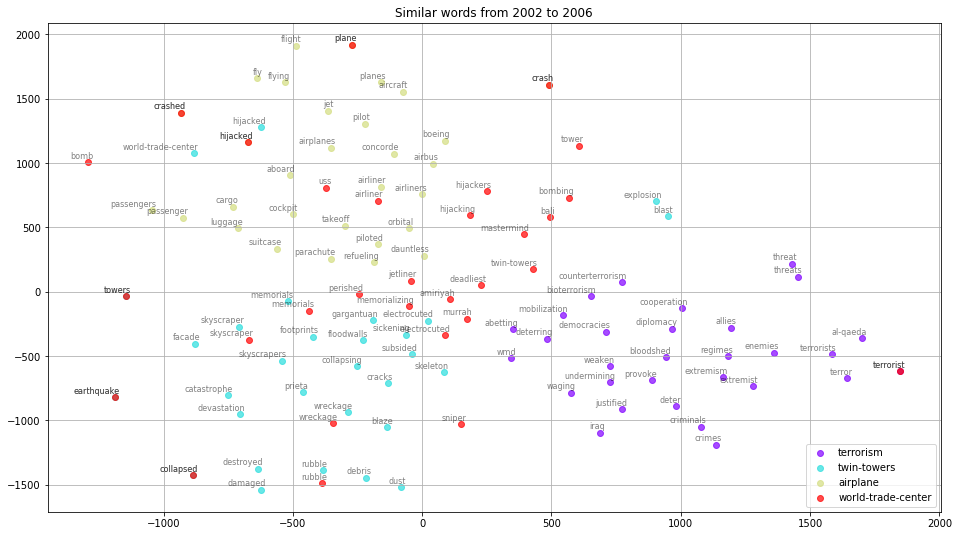

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 2002 to 2006', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_CADE_post2001.png')

## Plot contextual variability

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def context_var(words, embedding):
  
  X = embedding[words]
  pca = PCA(n_components=2)
  
  emb_pca = pca.fit_transform(X)

  plt.scatter(emb_pca[:, 0], emb_pca[:, 1])

  for id, word in enumerate(words):
    # annotate
    plt.annotate(word, xy=(emb_pca[id, 0], emb_pca[id, 1]))
  plt.xticks([])
  plt.yticks([])  

  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


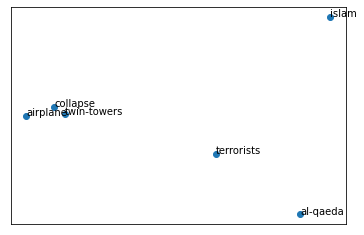

In [ ]:
context_var(['twin-towers', 'terrorists', 'collapse', 'airplane', 'islam', 'al-qaeda'], slice_2001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


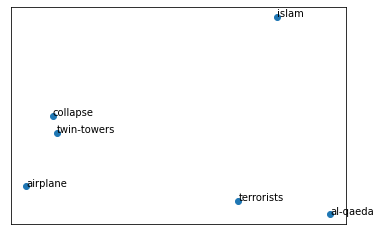

In [ ]:
context_var(['twin-towers', 'terrorists', 'collapse', 'airplane', 'islam', 'al-qaeda'], slice_post2001)